In [28]:
import mlrose_hiive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, f1_score, precision_score,recall_score
import time


## Wine Data

In [133]:
df = pd.read_csv('winequalityN.csv')
df_red = df[df['type']=='red'].reset_index(drop=True)
df_red['target'] = df_red['quality'].apply(lambda x : 1 if x >= 6 else 0)
df_red = df_red.drop(['type', 'quality'], axis=1)
df_red = df_red.dropna()
X_cols = [x for x in df_red.columns if x!= 'target']
scaler = StandardScaler(with_std = False)
df_red_std = pd.DataFrame(scaler.fit_transform(df_red[X_cols]), columns= X_cols) 
X_train, X_test, y_train, y_test = train_test_split(df_red_std[X_cols], df_red['target'], test_size=0.3, random_state=0)

# NN Model

## 1. Backprop

In [237]:
time_dict = {}
test_dict = {}

In [197]:
def get_metrics(y_true, y_pred):
    metrics = {}
    print('Accuracy:  {:2.2%} '.format(accuracy_score(y_true, y_pred)))
    print('Precision: {:2.2%} '.format(precision_score(y_true, y_pred)))
    print('Recall:    {:2.2%} '.format(recall_score(y_true, y_pred)))
    print('F1 Score:  {:2.2%} '.format(f1_score(y_true, y_pred)))
    print('AUC Score: {:2.2%} '.format(roc_auc_score(y_true, y_pred)))
    
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    metrics['F1 Score'] = f1_score(y_true, y_pred)
    metrics['AUC Score'] = roc_auc_score(y_true, y_pred)
    
    return metrics
    

In [236]:
%%time
# Regenerate HW1 NN using mlrose
start = time.time()
nn_model_backprop = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', 
                                                algorithm ='gradient_descent', 
                                                max_iters = 1000, bias = True, is_classifier = True, 
                                                learning_rate = 0.00001, early_stopping = True, 
                                                max_attempts = 1000, random_state = 123, 
                                                curve = True)
nn_model_backprop.fit(X_train, y_train)
end = time.time()
time_dict['Backprop'] = end - start

CPU times: user 9.63 s, sys: 2.75 s, total: 12.4 s
Wall time: 1.81 s


In [239]:
y_test_pred = nn_model_backprop.predict(X_test)

In [240]:
test_dict['Backprop'] = get_metrics(y_test, y_test_pred)

Accuracy:  70.29% 
Precision: 70.38% 
Recall:    73.79% 
F1 Score:  72.05% 
AUC Score: 70.16% 


Text(0.5, 1.0, 'Loss Curve (Backprop)')

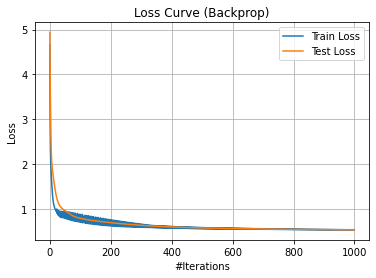

In [200]:
plt.plot(-nn_model_backprop.fitness_curve, label='Train Loss')
nn_model_backprop.fit(X_test, y_test)
plt.plot(-nn_model_backprop.fitness_curve, label='Test Loss')
plt.legend()
plt.grid()
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve (Backprop)')

## 2. RHC

In [226]:
%%time

nn_model_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', 
                                        algorithm ='random_hill_climb', 
                                        max_iters = 5000, bias = True, is_classifier = True, 
                                        learning_rate = 0.00001, early_stopping = True, 
                                        max_attempts = 1000, random_state = 123, curve = True)


CPU times: user 52 µs, sys: 1e+03 ns, total: 53 µs
Wall time: 58.9 µs


Accuracy:  47.28% 
Precision: 49.46% 
Recall:    74.19% 
F1 Score:  59.35% 
AUC Score: 46.23% 


Text(0.5, 1.0, 'Loss Curve (RHC)')

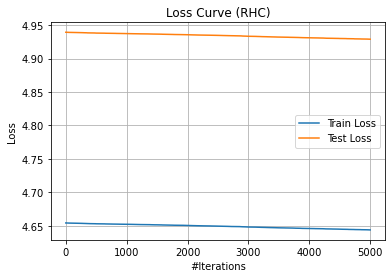

In [241]:
start = time.time()
nn_model_rhc.fit(X_train, y_train)
end = time.time()
time_dict['RHC'] = end-start
plt.plot(nn_model_rhc.fitness_curve[:,0], label='Train Loss')

y_test_pred = nn_model_rhc.predict(X_test)
test_dict['RHC'] = get_metrics(y_test, y_test_pred)

nn_model_rhc.fit(X_test, y_test)
plt.plot(nn_model_rhc.fitness_curve[:,0], label='Test Loss')
plt.grid()
plt.legend()
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve (RHC)')

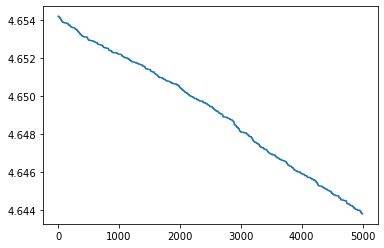

In [225]:
nn_model_rhc.fit(X_train, y_train)
plt.plot(nn_model_rhc.fitness_curve[:,0], label='Train Loss')

In [167]:
y_train_pred = nn_model_rhc.predict(X_train)

In [168]:
get_metrics(y_train, y_train_pred)

Accuracy:  48.97% 
Precision: 65.45% 
Recall:    11.94% 
F1 Score:  20.20% 
AUC Score: 52.26% 


{'Accuracy': 0.4896860986547085,
 'Precision': 0.6545454545454545,
 'Recall': 0.11940298507462686,
 'F1 Score': 0.20196353436185133,
 'AUC Score': 0.5225921175373134}

## 3. SA

In [220]:
%%time

nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', 
                                        algorithm ='simulated_annealing', 
                                        max_iters = 5000, bias = True, is_classifier = True, 
                                        learning_rate = 0.00001, early_stopping = True, 
                                        max_attempts = 1000, random_state = 42, curve = True)



CPU times: user 52 µs, sys: 1 µs, total: 53 µs
Wall time: 58.2 µs


Accuracy:  48.74% 
Precision: 54.05% 
Recall:    8.06% 
F1 Score:  14.04% 
AUC Score: 50.34% 


Text(0.5, 1.0, 'Loss Curve (SA)')

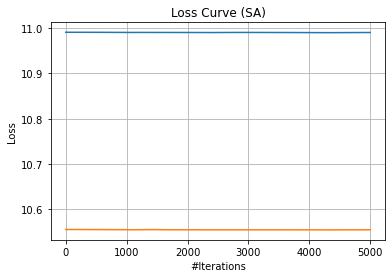

In [242]:
start = time.time()
nn_model_sa.fit(X_train, y_train)
end = time.time()
time_dict['SA'] = end - start
plt.plot(nn_model_sa.fitness_curve[:,0], label='Train Loss')

y_test_pred = nn_model_sa.predict(X_test)
test_dict['SA'] = get_metrics(y_test, y_test_pred)

nn_model_sa.fit(X_test, y_test)
plt.plot(nn_model_sa.fitness_curve[:,0], label='Test Loss')
plt.grid()
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve (SA)')

Text(0.5, 1.0, 'Loss Curve (SA)')

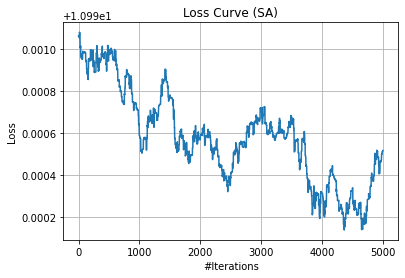

In [222]:
nn_model_sa.fit(X_train, y_train)
plt.plot(nn_model_sa.fitness_curve[:,0], label='Train Loss')
plt.grid()
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve (SA)')

In [180]:
y_train_pred = nn_model_sa.predict(X_train)

In [181]:
get_metrics(y_train, y_train_pred)

Accuracy:  48.97% 
Precision: 65.45% 
Recall:    11.94% 
F1 Score:  20.20% 
AUC Score: 52.26% 


{'Accuracy': 0.4896860986547085,
 'Precision': 0.6545454545454545,
 'Recall': 0.11940298507462686,
 'F1 Score': 0.20196353436185133,
 'AUC Score': 0.5225921175373134}

## 3. GA

In [228]:
%%time

nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [12], activation ='relu', 
                                        algorithm ='genetic_alg', 
                                        max_iters = 1000, bias = True, is_classifier = True, 
                                        learning_rate = 0.00001, early_stopping = True, 
                                        max_attempts = 1000, random_state = 42, curve = True)


CPU times: user 42 µs, sys: 1e+03 ns, total: 43 µs
Wall time: 48.9 µs


Accuracy:  58.79% 
Precision: 74.76% 
Recall:    31.05% 
F1 Score:  43.87% 
AUC Score: 59.87% 


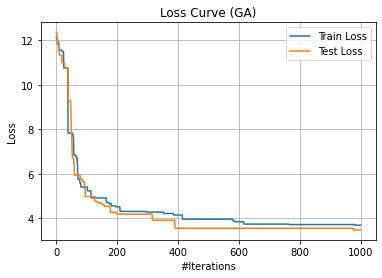

In [243]:
start = time.time()
nn_model_ga.fit(X_train, y_train)
end = time.time()
time_dict['GA'] = end - start
plt.plot(nn_model_ga.fitness_curve[:,0], label='Train Loss')

y_test_pred = nn_model_ga.predict(X_test)
test_dict['GA'] = get_metrics(y_test, y_test_pred)

nn_model_ga.fit(X_test, y_test)
plt.plot(nn_model_ga.fitness_curve[:,0], label='Test Loss')
plt.grid()
plt.legend()
plt.xlabel('#Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve (GA)')
plt.show()

In [244]:
time_dict

{'Backprop': 1.8050830364227295,
 'RHC': 5.0539939403533936,
 'sa': 1.3710319995880127,
 'SA': 6.649356842041016,
 'GA': 143.56051206588745}

In [245]:
test_dict

{'Backprop': {'Accuracy': 0.702928870292887,
  'Precision': 0.7038461538461539,
  'Recall': 0.7379032258064516,
  'F1 Score': 0.7204724409448819,
  'AUC Score': 0.7015603085553996},
 'RHC': {'Accuracy': 0.47280334728033474,
  'Precision': 0.4946236559139785,
  'Recall': 0.7419354838709677,
  'F1 Score': 0.5935483870967743,
  'AUC Score': 0.46227208976157075},
 'SA': {'Accuracy': 0.4874476987447699,
  'Precision': 0.5405405405405406,
  'Recall': 0.08064516129032258,
  'F1 Score': 0.14035087719298245,
  'AUC Score': 0.5033660589060308},
 'GA': {'Accuracy': 0.5878661087866108,
  'Precision': 0.7475728155339806,
  'Recall': 0.31048387096774194,
  'F1 Score': 0.43874643874643876,
  'AUC Score': 0.5987201963534361}}

In [255]:
out_df = pd.DataFrame(test_dict).T.sort_values('Accuracy', ascending=False)
out_df

,Accuracy,Precision,Recall,F1 Score,AUC Score
Backprop,0.702929,0.703846,0.737903,0.720472,0.701560
GA,0.587866,0.747573,0.310484,0.438746,0.598720
SA,0.487448,0.540541,0.080645,0.140351,0.503366
RHC,0.472803,0.494624,0.741935,0.593548,0.462272


In [252]:
del time_dict['sa']

In [256]:
out_df['time'] = pd.Series(time_dict).T

In [258]:
out_df[['Accuracy', 'AUC Score', 'time']]

,Accuracy,AUC Score,time
Backprop,0.702929,0.701560,1.805083
GA,0.587866,0.598720,143.560512
SA,0.487448,0.503366,6.649357
RHC,0.472803,0.462272,5.053994


In [259]:
out_df

,Accuracy,Precision,Recall,F1 Score,AUC Score,time
Backprop,0.702929,0.703846,0.737903,0.720472,0.701560,1.805083
GA,0.587866,0.747573,0.310484,0.438746,0.598720,143.560512
SA,0.487448,0.540541,0.080645,0.140351,0.503366,6.649357
RHC,0.472803,0.494624,0.741935,0.593548,0.462272,5.053994
